In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
salary_data = pd.read_csv('/Users/hackthebox/Downloads/Machine-Learning-Self-Study/Regression/Simple Linear Regression/Data/Salary_dataset.csv')

In [3]:
salary_data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [8]:
salary_data.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
salary_data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [10]:
x = salary_data[['YearsExperience']]
y = salary_data.Salary

In [ ]:
# x = salary_data.iloc[:,:-1].values
# y = salary_data.iloc[:,1].values

<Axes: xlabel='YearsExperience', ylabel='Salary'>

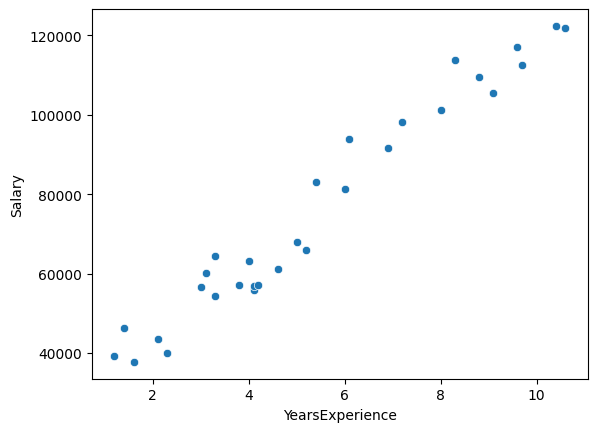

In [18]:
sns.scatterplot(data=salary_data,x='YearsExperience',y='Salary')


<div style="text-align: center; color: yellow; font-size: 24px; font-weight: bold;">
    SIMPLE LINEAR REGRESSION WITH TRAIN AND TEST DATA
</div>

- In previous notebook ,We are giving all the rows of the dataset to Simple Linear Regression model and the mmodel got trained on the data.But in many cases,this may not be the case.The Machine Learining exparts divide the data rows in 2 parts: some rows are used for training the model and the other rows are used for testing purpose.
- Generally, 70% of the rows are used for the purpose of training the model and remaining 30% are used for testing the model. 
- 80% of the rows are used for the purpose of training the model and remaining 20% are used for testing the model. 
- Used for sklearn package model_selection ,function name is train_test_split().This function is used to split the data rows into 4 parts-x_train,x_test,y_train,y_test.
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

![image](https://www.machinelearningplus.com/wp-content/uploads/2022/12/train_test_split-procedure.jpg)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

- How it randomly selects depending on teh seed given in random state.Suppose random_state = 0,then it will take the seed 0 and creates some random numbers, like :3,1,5,6,9.That means the 3rd,1st,5th,6th and 9th rows are selected for the testing perpose.When the seed 0 is given,it will always generate the same row numbers for selecting the test data.Hence the output of the program will be same on running several times.If the seed number is changed ,then it will select a different set of rows.
- If we do not use random_state attribute,then it will generate an integer number randomly and based on that selects the rows for testing.These rows may change every time when the program is run.

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [14]:
print("Training is completed")

Training is completed


In [16]:
y_pred = reg.predict(x_test)
y_pred

array([115574.62288352,  71680.93878159, 102499.90847018,  75416.57147111,
        55804.4998511 ,  60474.04071301, 122111.98009019, 107169.44933209,
        63275.76523015])

In [17]:
from sklearn.metrics import r2_score
r_score = r2_score(y_test, y_pred)
print("Accuracy of the Model is:",r_score)

Accuracy of the Model is: 0.9414466227178215


- We can find the accuracy of the model ,by comparing y_test and y_pred data using r2_score() function.
- Another way to measure the accuracy of Linear Regression Model is by calling score() moethod on the model obj(reg).
   * The score() method takes x_test and calculates y_pred values based on x_test.Then it compares y_test and y_pred values to provide the score of the model.Hence we get same score with r2_score() function and score() method.

In [33]:
model_score = reg.score(x_test,y_test)
print("Model Score is:",model_score)

Model Score is: 0.9414466227178215


In [19]:
from sklearn.metrics import r2_score

def adjusted_r2(r2, n, p):
    """
    Calculate Adjusted R-squared.
    
    Parameters:
    - r2: R-squared value.
    - n: Number of data points (observations).
    - p: Number of independent variables (predictors).
    
    Returns:
    - Adjusted R-squared value.
    """
    return 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

# Example usage
# Sample data
y_true = y_test
y_pred1 = y_pred

# Calculate R-squared
r2 = r2_score(y_true, y_pred1)

# Number of observations and predictors
n = len(y_true)  # number of data points
p = 1  # number of predictors (for simple linear regression)

# Calculate Adjusted R-squared
adj_r2 = adjusted_r2(r2, n, p)

print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adj_r2}")

R-squared: 0.9414466227178215
Adjusted R-squared: 0.9330818545346532


In [20]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", mape)

Mean Absolute Percentage Error: 0.06647815679384321


In [21]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:",mse)

Mean Squared Error: 37784662.46621308


In [31]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 6146.9230079945755


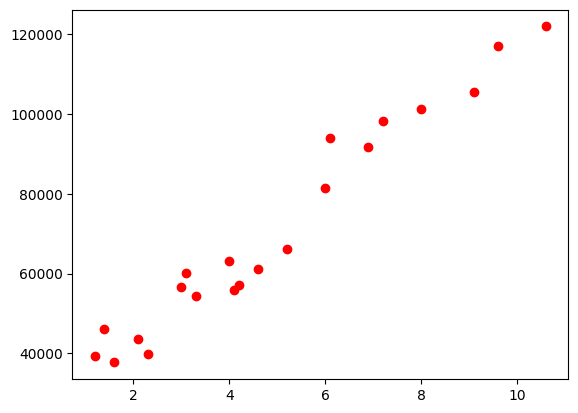

In [22]:
plt.scatter(x_train,y_train,color='red')

#### Regression line should be drawn using train data and predicted data.

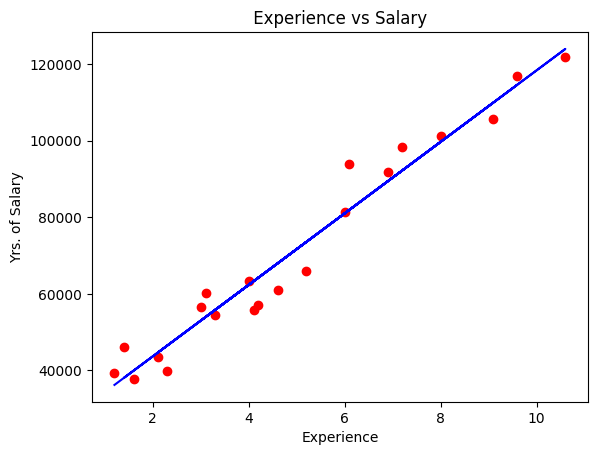

In [26]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,reg.predict(x_train),color='blue')
plt.title(' Experience vs Salary ')
plt.xlabel('Experience')
plt.ylabel('Yrs. of Salary')
plt.show()

In [30]:
y_test

27    112636.0
15     67939.0
23    113813.0
17     83089.0
8      64446.0
9      57190.0
28    122392.0
24    109432.0
12     56958.0
Name: Salary, dtype: float64

- Remember , the input should be in the form of 2D array and the output will be given to us in the form of 1D array by any Machine Learning Model.

In [29]:
print(reg.predict([[11]]))

[127715.42912448]
